<a href="https://colab.research.google.com/github/St-Jester/cv_hw4/blob/main/Copy_of_FindEllipses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1) (3 points) Implement 5-point and 6-point algorithm for finding ellipses;

1.2) (4 points) Build plot with 2 functions:

(X) maximum deviation of points (0..20 pixels, step = 1),
(Y) maximum deviation of ellipse points from the correct ellipse for 5-point method (function 1) and 6-point method (function 2)
Make at least 100 attempts for every point of the plot and calculate mean value as a result

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


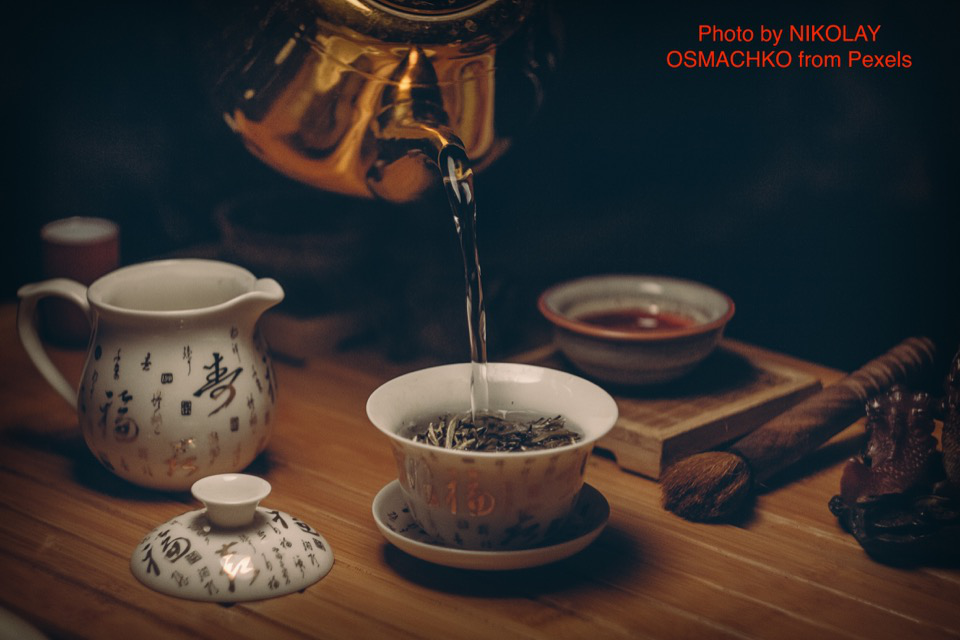

In [ ]:
import cv2
import numpy as np
from math import *
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)
cv2_imshow(imgc)

[[2.97924e+05 1.65649e+05 7.32000e+02 8.14000e+02 1.00000e+00]
 [3.72438e+05 1.31769e+05 1.02600e+03 7.26000e+02 1.00000e+00]
 [3.21204e+05 1.81476e+05 7.54000e+02 8.52000e+02 1.00000e+00]
 [4.43232e+05 2.07936e+05 9.72000e+02 9.12000e+02 1.00000e+00]
 [5.07370e+05 2.01601e+05 1.13000e+03 8.98000e+02 1.00000e+00]]
[[-1.43150926e-01]
 [ 7.15055419e+00]
 [-4.33622798e+02]
 [-2.85454121e+03]
 [ 1.36521838e+06]]
[[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]
Ellipse 
[[-2.18569767e-08]]
[[-2.45345291e-08]]
[[-2.19079084e-08]]
[[-2.42143869e-08]]
[[-2.49710865e-08]]
u =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
m1v.T =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
v =

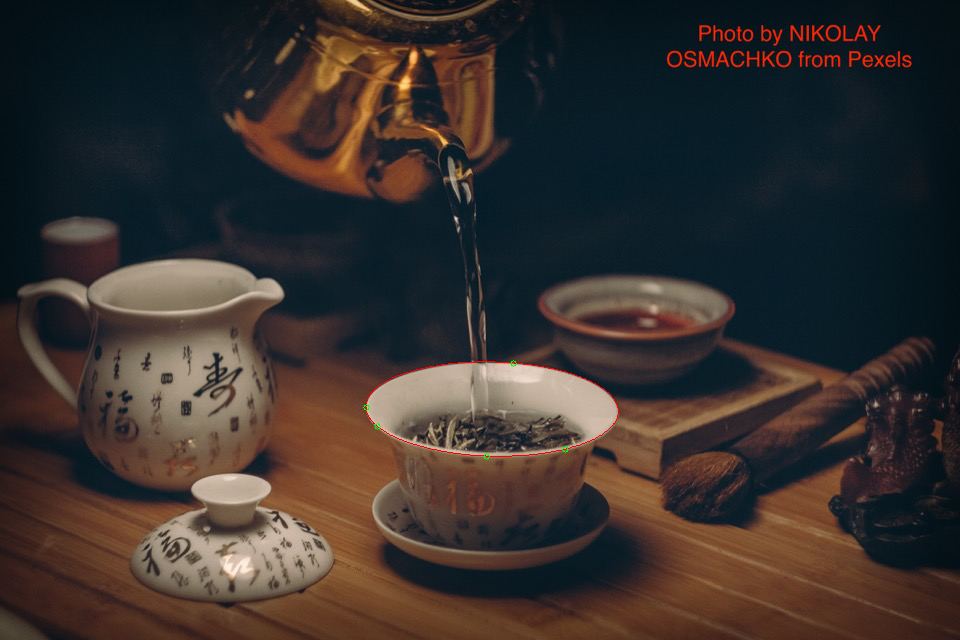

In [ ]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]
  
print(m)
p = -np.matmul(np.linalg.inv(m), r)

print(p)
# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# this is to make selection of the point easier
import random
rnd = random.randint(0,360)
# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  if alpha == rnd:

    print(f"{a1} is radom")
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

[[1.33956e+05 2.97924e+05 1.65649e+05 7.32000e+02 8.14000e+02 1.00000e+00]
 [2.63169e+05 3.72438e+05 1.31769e+05 1.02600e+03 7.26000e+02 1.00000e+00]
 [1.42129e+05 3.21204e+05 1.81476e+05 7.54000e+02 8.52000e+02 1.00000e+00]
 [2.36196e+05 4.43232e+05 2.07936e+05 9.72000e+02 9.12000e+02 1.00000e+00]
 [3.19225e+05 5.07370e+05 2.01601e+05 1.13000e+03 8.98000e+02 1.00000e+00]
 [3.80689e+05 5.01004e+05 1.64836e+05 1.23400e+03 8.12000e+02 1.00000e+00]]
[[ 1.00000000e+00 -1.48831814e-01 -4.31060027e+02]
 [-1.48831814e-01  7.11900368e+00 -2.83878673e+03]
 [-4.31060027e+02 -2.83878673e+03  1.35742696e+06]]
Ellipse 
[[-10.10425153]]
[[2.58156154]]
[[13.34596905]]
[[-10.7551224]]
[[9.11157398]]
[[-4.17936005]]
u =  [[-3.17554574e-04  6.51844068e-01  7.58352959e-01]
 [-2.09129669e-03 -7.58351771e-01  6.51842172e-01]
 [ 9.99997763e-01 -1.37894557e-03  1.60401742e-03]]
m1v.T =  [[-3.17554574e-04  6.51844068e-01  7.58352959e-01]
 [-2.09129669e-03 -7.58351771e-01  6.51842172e-01]
 [ 9.99997763e-01 -1.

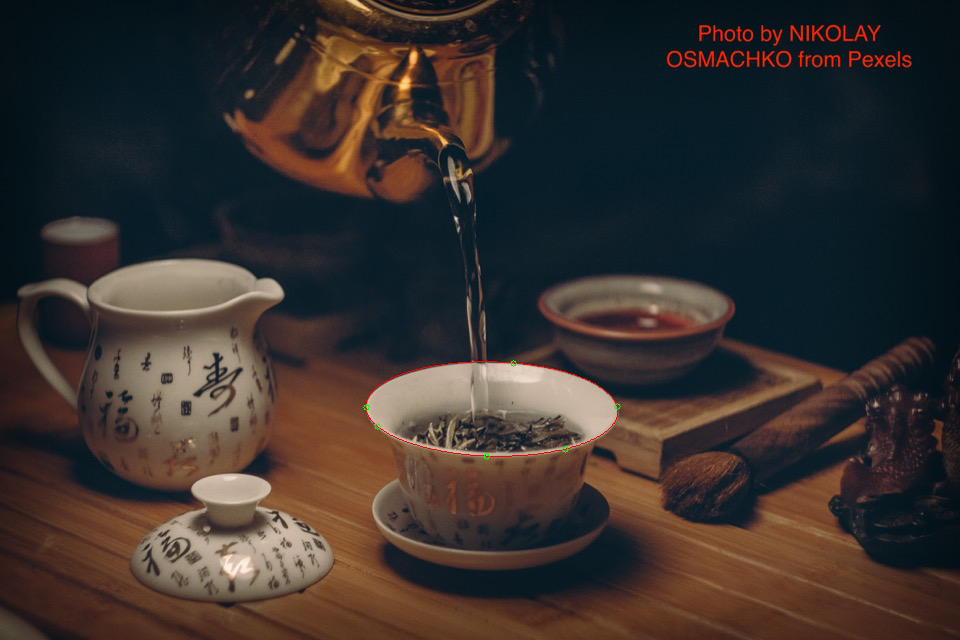

In [ ]:
# 1.1) (3 points) Implement 5-point and 6-point algorithm for finding ellipses;

# 6 point alg
img_6points = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449],  [617, 406] ], np.double)

m = np.zeros((6,6))
r = np.zeros((6,1))

# set matcix for 6 points algorithm
for k in range(0, len(points)):
  m[k][0] =  points[k][0]*points[k][0]
  m[k][1] = 2*points[k][0]*points[k][1]
  m[k][2] = points[k][1]*points[k][1]
  m[k][3] = 2*points[k][0]
  m[k][4] = 2*points[k][1]
  m[k][5] = 1

  # r[k] = points[k][0]*points[k][0]

print(m)
# p = -np.matmul(np.linalg.inv(m), r)

# perform svd
mu, ms, mv = np.linalg.svd(m)
R = mv[5, :] # last row of mv

R /= R[0]
E = np.array(
[[R[0], R[1], R[3]],
[R[1], R[2], R[4]],
[R[3], R[4], R[5]] ], np.double )

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
# E = np.array(
#       [[  1, p[0], p[2]],
#       [p[0], p[1], p[3]],
#       [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  



#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )


# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img_6points, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img_6points, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img_6points)

In [ ]:
# this is cell with functions that will be used next
# technically this is a previously written algoritms rewriten in the way that they return needed values

def get_H_5_points(points):
  m = np.zeros((5,5))
  r = np.zeros((5,1))

  for k in range(0, len(points)):
    m[k][0] = 2*points[k][0]*points[k][1]
    m[k][1] = points[k][1]*points[k][1]
    m[k][2] = 2*points[k][0]
    m[k][3] = 2*points[k][1]
    m[k][4] = 1
    r[k] = points[k][0]*points[k][0]
    
  # print(m)
  p = -np.matmul(np.linalg.inv(m), r)

  # print(p)
  # p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
  E = np.array(
        [[  1, p[0], p[2]],
        [p[0], p[1], p[3]],
        [p[2], p[3], p[4]] ], np.double )

  # print(E)

  # print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

  # result on given points:
  # for k in range(0, len(points)):
    # print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
    
  #find circle->ellipse conversion
  u, s, v = np.linalg.svd(E)
  u2 = np.matmul(u, np.diag(np.sqrt(s)) )
  H = np.linalg.inv( u2.T)

  # print( "u = ", u )
  # print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

  # print( "v = ", v )
  # print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )

  return H

# Also good for 6 points as it is indentical
def get_5_point_ellipse_deviation(H,H_deviated ):

  all_dists = []
  # draw ellipse
  for alpha in range(0,360):
    a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
    a1 = (a1/a1[2])

    a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
    a2 = (a2/a2[2])


    a1_dev = np.matmul( H_deviated, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
    a1_dev = (a1_dev/a1_dev[2])

    a2_dev = np.matmul( H_deviated, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
    a2_dev = (a2_dev/a2_dev[2])

    dist = np.linalg.norm(np.array((a1,a2))-np.array((a1_dev, a2_dev)))
    all_dists.append(dist)

  max_dist = max(all_dists)
  max_std = np.std(all_dists).max()
  return (max_dist, max_std)



def get_H_6_points(points):
  m = np.zeros((6,6))
  r = np.zeros((6,1))

  # set matcix for 6 points algorithm
  for k in range(0, len(points)):
    m[k][0] =  points[k][0]*points[k][0]
    m[k][1] = 2*points[k][0]*points[k][1]
    m[k][2] = points[k][1]*points[k][1]
    m[k][3] = 2*points[k][0]
    m[k][4] = 2*points[k][1]
    m[k][5] = 1

    # r[k] = points[k][0]*points[k][0]


  # p = -np.matmul(np.linalg.inv(m), r)

  # perform svd
  mu, ms, mv = np.linalg.svd(m)
  R = mv[5, :] # last row of mv

  R /= R[0]
  E = np.array(
  [[R[0], R[1], R[3]],
  [R[1], R[2], R[4]],
  [R[3], R[4], R[5]] ], np.double )

  # p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
  # E = np.array(
  #       [[  1, p[0], p[2]],
  #       [p[0], p[1], p[3]],
  #       [p[2], p[3], p[4]] ], np.double )

  # print(E)

  u, s, v = np.linalg.svd(E)
  u2 = np.matmul(u, np.diag(np.sqrt(s)) )
  H = np.linalg.inv( u2.T)

  return H


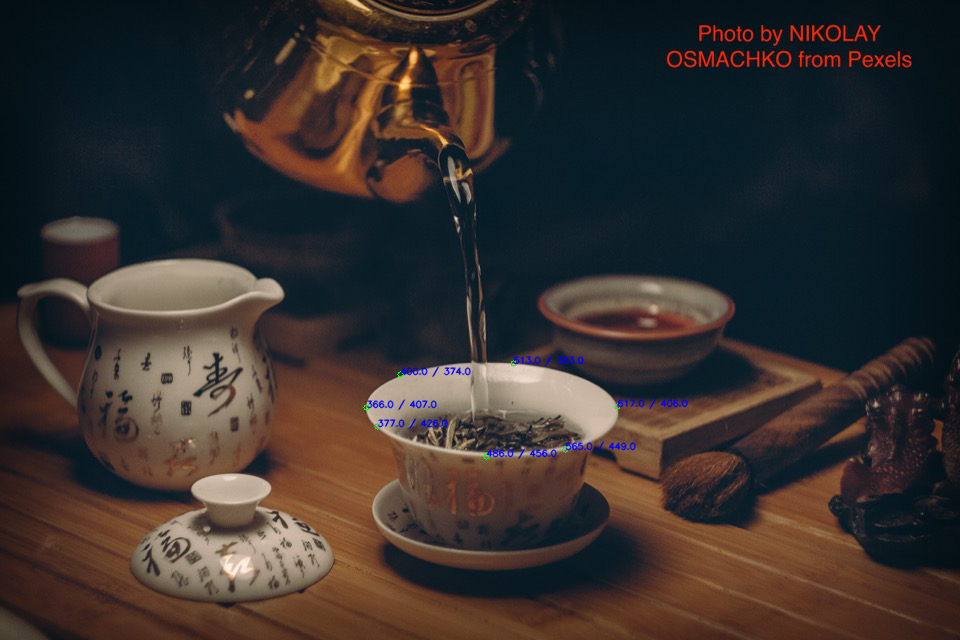

In [ ]:
# this is just for me to determine if the coordiantes set correctly. This is done to simplify the search of points on the ellipse

img_test = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [400, 374], [617, 406] ], np.double)
for k in range(0, len(points)):
  cv2.circle(img_test, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  # font 
  font = cv2.FONT_HERSHEY_SIMPLEX 
    
  # org 
  org = (int(points[k][0]),int(points[k][1]))
    
  # fontScale 
  fontScale = 0.3
  
    
  # Blue color in BGR 
  color = (255, 0, 0) 
    
  # Line thickness of 2 px 
  thickness = 1
   
# Using cv2.putText() method 
  image = cv2.putText(img_test, str(points[k][0]) +" / " +str(points[k][1]), org, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
 
cv2_imshow(img_test)

In [ ]:
# 1.2) (4 points) Build plot with 2 functions:

# (X) maximum deviation of points (0..20 pixels, step = 1),
# (Y) maximum deviation of ellipse points from the correct ellipse for 5-point method (function 1) and 6-point method (function 2)
# Make at least 100 attempts for every point of the plot and calculate mean value as a result

# get 100 attempts for each point
from math import pi
import random



# array that holds xs, ys for each step
all_coordinates = np.zeros((20,2,100))

# test 5 point function
# generate random point on the circle 
H = get_H_5_points(points)

def generate_deviated_coords(startx,starty, step, amount = 100):
  """Return an array of generated coordinates in form of (xs, ys)
  """

  xs = []
  ys = []
  for i in range(0,amount):

    r = step * sqrt(random.random())
    theta = random.random() * 2 * pi

    # in Cartesian coordinates
    x =  startx + step * cos(theta)
    y =  starty + step * sin(theta)
    xs.append(x)
    ys.append(y)
  return (xs, ys)



# the point to be moved is the point [513, 363] because it is far from other points and it is convenient

# function 1 5 points
points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449] ], np.double)

target_point = points[1]
start_x = target_point[0]
start_y = target_point[1]

for step in range(0, 20):
  all_coordinates[step, 0], all_coordinates[step, 1]  = generate_deviated_coords(start_x, start_y, step)


max_dist_per_step = np.zeros((20,))
max_dev_per_step =  np.zeros((20,))
max_ellipse_dist = []
max_ellipse_dev = []
max_dist = 0
points_deviated = points.copy()



import time

start = time.time()

for arr_step in range(1, all_coordinates.shape[0]):
  fist_arr = all_coordinates[arr_step, 0]
  second_arr = all_coordinates[arr_step, 1]
  points_deviated = points.copy()
  

  for a,r in np.nditer([fist_arr, second_arr]):
     points_deviated[1] = [a, r]
 
     H_deviated = get_H_5_points(points_deviated)
     max_distance, max_deviation = get_5_point_ellipse_deviation(H, H_deviated)
     max_ellipse_dist.append(max_distance)
     max_ellipse_dev.append(max_deviation)

     

  max_dist_per_step[arr_step] = np.mean(max_ellipse_dist)
  max_dev_per_step[arr_step]= np.mean(max_ellipse_dev)

end = time.time()
print(f'{end-start}s')

# plt.plot(all_coordinates[3, 1], all_coordinates[3, 2],  'ro')
# plt.ylabel('some numbers')
# plt.show()
# max_distances

55.10740876197815s


In [ ]:
max_dev_per_step

array([0.        , 0.51428599, 0.7385118 , 0.98077926, 1.19879399,
       1.42846833, 1.65581568, 1.90663451, 2.14964817, 2.39491466,
       2.60965206, 2.82623717, 3.0868066 , 3.31115704, 3.59112307,
       3.82450249, 4.05644652, 4.25561303, 4.5305821 , 4.79716107])

In [ ]:
# test 6 point function
all_coordinates_6 = np.zeros((20,2,100))

# test 5 point function
# generate random point on the circle 
H = get_H_6_points(points)



# the point to be moved is the point [513, 363] because it is far from other points and it is convenient

# function 1 5 points
points_6 = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449],  [617, 406] ], np.double)

target_point_6 = points[1]
start_x_6 = target_point[0]
start_y_6 = target_point[1]

for step in range(0, 20):
  all_coordinates_6[step, 0], all_coordinates_6[step, 1]  = generate_deviated_coords(start_x, start_y, step)


max_dist_per_step_6 = np.zeros((20,))
max_dev_per_step_6 = np.zeros((20,))
max_ellipse_dist_6 = []
max_ellipse_dev_6 = []
max_dist_6 = 0
points_deviated_6 = points_6.copy()



import time

start = time.time()

for arr_step in range(1, all_coordinates_6.shape[0]):
  fist_arr = all_coordinates_6[arr_step, 0]
  second_arr = all_coordinates_6[arr_step, 1]
  points_deviated_6 = points_6.copy()
  

  for a,r in np.nditer([fist_arr, second_arr]):
     points_deviated_6[1] = [a, r]
 
     H_deviated = get_H_6_points(points_deviated_6)
     max_distance, max_deviation = get_5_point_ellipse_deviation(H, H_deviated)
     max_ellipse_dist_6.append(max_distance)
     max_ellipse_dev_6.append(max_deviation)

     

  max_dist_per_step_6[arr_step] = np.mean(max_ellipse_dist_6)
  max_dev_per_step_6[arr_step]= np.mean(max_ellipse_dev_6)

end = time.time()
print(f'{end-start}s')

54.83441948890686s


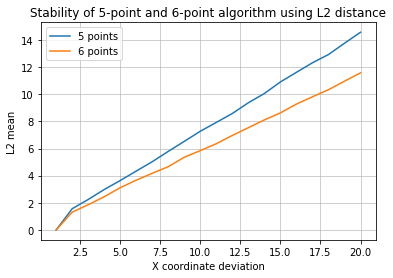

In [ ]:
plt.plot(np.arange(1,21), max_dist_per_step, label = "5 points")
plt.plot(np.arange(1,21),max_dist_per_step_6, label = "6 points")
plt.xlabel('X coordinate deviation')
plt.ylabel('L2 mean')
plt.grid(linestyle='-', linewidth=0.6)
plt.legend()
plt.title('Stability of 5-point and 6-point algorithm using L2 distance')
plt.show()

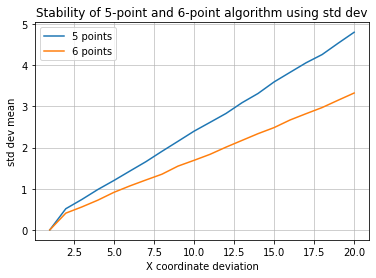

In [ ]:
plt.plot(np.arange(1,21), max_dev_per_step, label = "5 points")
plt.plot(np.arange(1,21),max_dev_per_step_6, label = "6 points")
plt.xlabel('X coordinate deviation')
plt.ylabel('std dev mean')
plt.grid(linestyle='-', linewidth=0.6)
plt.legend()
plt.title('Stability of 5-point and 6-point algorithm using std dev')
plt.show()

As shown on plots, 6 point algorithm is more stable than 5 point